In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, make_scorer, accuracy_score, log_loss, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,  BatchNormalization,LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Regression - All Games with Ratings

In [ ]:
df_reg = pd.read_csv('../data/preprocessed_games_with_rating_reg.csv')
print(df_reg.shape)
df_reg

(17225, 302)


,id,2d,3d,ability,able,access,account,achievement,achievements,action,adventure,alien,ancient,and,anime,app,arcade,area,army,art,atmospheric,attack,available,base,based,battle,beautiful,best,big,bonus,boss,building,campaign,car,card,cards,challenge,character,choice,city,...,term,thing,third,time,title,to,tool,top,town,track,trading,trap,true,turn,type,ultimate,unique,unit,universe,up,upgrade,use,variety,various,vehicle,version,video,violent,visual,war,way,weapon,whole,work,world,www,year,young,zombie,success
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077217,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.125313,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.162803,0.0,0.000000,0.153484,0.000000,0.0,0.0,0.000000,0.137531,0.098372,0.0,0.0,...,0.0,0.000000,0.149081,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.206121,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.18409,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.159854,0.0,0.000000,0.0,0.0,3.365706
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.170055,0.090338,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.105190,0.0,0.000000,0.154269,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.128837,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.375422,0.076147,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.086511,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.125708,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.147969,0.335459,0.0,0.000000,0.0,0.0,3.534269
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042543,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.084869,0.069041,0.0,0.074181,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.055244,0.000000,0.054198,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.054466,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.093124,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.056385,0.063615,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.423796
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069849,0.000000,0.000000,0.161577,0.0,0.0,0.000000,0.138009,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.105111,0.0,0.124897,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.090703,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.089426,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.135467,0.00000,0.000000,0.0,0.0,0.145745,0.134629,0.000000,0.313342,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.234114
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333835,0.177341,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.103249,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.265924,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.245663,0.074742,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.095134,0.0,0.000000,0.065854,0.0,0.000000,0.0,0.0,2.744355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.335763,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000

In [48]:
df_reg.describe()

,id,2d,3d,ability,able,access,account,achievement,achievements,action,adventure,alien,ancient,and,anime,app,arcade,area,army,art,atmospheric,attack,available,base,based,battle,beautiful,best,big,bonus,boss,building,campaign,car,card,cards,challenge,character,choice,city,...,term,thing,third,time,title,to,tool,top,town,track,trading,trap,true,turn,type,ultimate,unique,unit,universe,up,upgrade,use,variety,various,vehicle,version,video,violent,visual,war,way,weapon,whole,work,world,www,year,young,zombie,success
count,1.722500e+04,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,...,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,1.722500e+04
mean,1.321518e+05,0.023548,0.009315,0.020993,0.010572,0.015243,0.008524,0.010842,0.035453,0.035401,0.034554,0.011593,0.010877,0.008956,0.013047,0.013242,0.009635,0.010258,0.010406,0.013376,0.019824,0.012928,0.016567,0.008103,0.019459,0.029969,0.010802,0.016565,0.010951,0.008363,0.010010,0.014330,0.012366,0.011276,0.013618,0.026987,0.017534,0.042547,0.013141,0.020315,...,0.010021,0.012505,0.014145,0.040507,0.010675,0.017870,0.008191,0.013970,0.010462,0.010899,0.029150,0.008565,0.012554,0.018106,0.012750,0.008780,0.030547,0.010986,0.010774,0.009247,0.010139,0.009308,0.012865,0.013346,0.010070,0.016595,0.013250,0.011898,0.013452,0.016716,0.032200,0.030712,0.008161,0.008532,0.060226,0.008287,0.018502,0.009587,0.008416,-1.452023e-16
std,2.338804e+05,0.054914,0.039767,0.057096,0.043032,0.046096,0.046155,0.048747,0.043636,0.069592,0.073576,0.060691,0.050113,0.040844,0.050257,0.050186,0.052054,0.046820,0.051347,0.050868,0.050006,0.050415,0.049499,0.045708,0.062048,0.073433,0.047085,0.052284,0.046806,0.042636,0.045931,0.056450,0.052020,0.070063,0.074984,0.048845,0.055105,0.082742,0.052135,0.077493,...,0.055109,0.048962,0.049136,0.070098,0.049508,0.051209,0.043564,0.049463,0.055987,0.057691,0.053076,0.046661,0.048128,0.066061,0.048749,0.042789,0.060150,0.059952,0.049127,0.042821,0.046439,0.040644,0.044820,0.047735,0.056684,0.064935,0.065709,0.046436,0.055483,0.062357,0.064211,0.074040,0.039151,0.042916,0.089478,0.045501,0.059932,0.047310,0.062893,1.000029e+00
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.374671e+00
25%,1.340700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

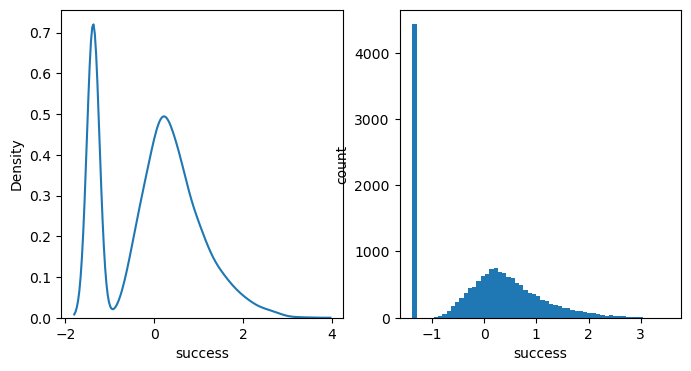

In [49]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df_reg['success'])
plt.xlabel('success')
plt.subplot(1,2,2)
plt.hist(df_reg['success'], bins=60)
plt.xlabel('success')
plt.ylabel('count')
plt.show()

In [50]:
X = df_reg.iloc[:,1:-1]
y = df_reg.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len}')

Train size: 13780
Validation size: 1722
Test size: <built-in function len>


In [51]:
# Ridge Linear Regression

rlr_model = Ridge(alpha=1.0)

rlr_model.fit(X_train, y_train)

y_pred = rlr_model.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

RMSE: 0.8262
R²: 0.3067


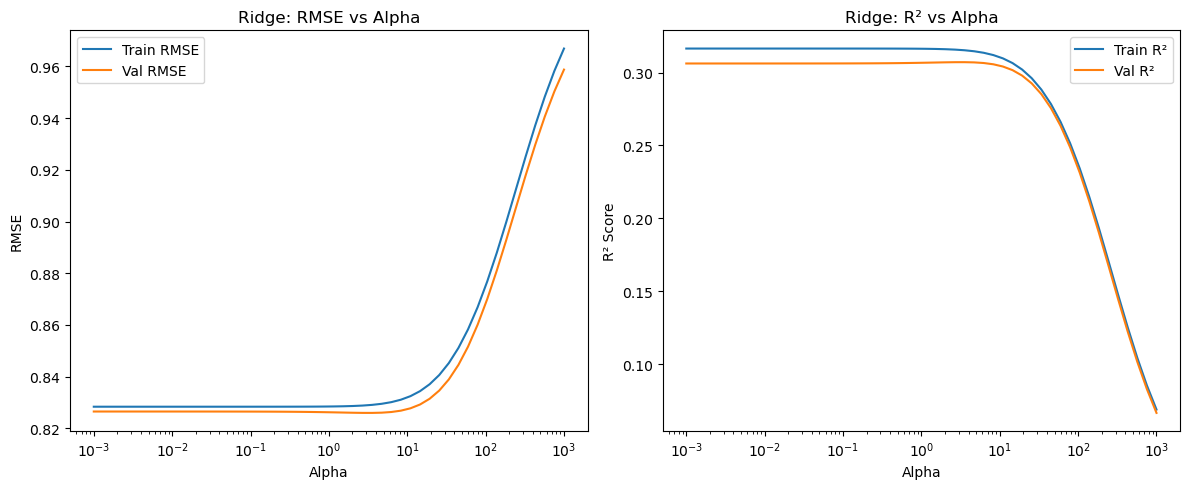

In [52]:
alpha_list = []
rmse_train_list = []
rmse_val_list = []
r2_train_list = []
r2_val_list = []

for alpha in np.logspace(-3, 3, 50):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_val = root_mean_squared_error(y_val, y_val_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)

    alpha_list.append(alpha)
    rmse_train_list.append(rmse_train)
    rmse_val_list.append(rmse_val)
    r2_train_list.append(r2_train)
    r2_val_list.append(r2_val)

plt.figure(figsize=(12, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
plt.plot(alpha_list, rmse_train_list, label="Train RMSE")
plt.plot(alpha_list, rmse_val_list, label="Val RMSE")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Ridge: RMSE vs Alpha")
plt.legend()

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(alpha_list, r2_train_list, label="Train R²")
plt.plot(alpha_list, r2_val_list, label="Val R²")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Ridge: R² vs Alpha")
plt.legend()

plt.tight_layout()
plt.show()


In [53]:
optimal_alpha = (
    alpha_list[rmse_val_list.index(min(rmse_val_list))] +
    alpha_list[r2_val_list.index(max(r2_val_list))]
)/2

rlr_model_2 = Ridge(alpha=optimal_alpha)

rlr_model_2.fit(X_train, y_train)

y_pred = rlr_model_2.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Optimal RMSE: {rmse:.4f}')
print(f'Optimal R²: {r2:.4f}')


Optimal RMSE: 0.8260
Optimal R²: 0.3071


[0]	validation_0-rmse:0.99235	validation_1-rmse:0.98492
[1]	validation_0-rmse:0.98217	validation_1-rmse:0.97536
[2]	validation_0-rmse:0.97314	validation_1-rmse:0.96661
[3]	validation_0-rmse:0.96476	validation_1-rmse:0.95967
[4]	validation_0-rmse:0.95694	validation_1-rmse:0.95279
[5]	validation_0-rmse:0.94947	validation_1-rmse:0.94595
[6]	validation_0-rmse:0.94238	validation_1-rmse:0.93991
[7]	validation_0-rmse:0.93525	validation_1-rmse:0.93427
[8]	validation_0-rmse:0.92897	validation_1-rmse:0.92942
[9]	validation_0-rmse:0.92311	validation_1-rmse:0.92505
[10]	validation_0-rmse:0.91735	validation_1-rmse:0.92110
[11]	validation_0-rmse:0.91189	validation_1-rmse:0.91682
[12]	validation_0-rmse:0.90641	validation_1-rmse:0.91270
[13]	validation_0-rmse:0.90171	validation_1-rmse:0.90938
[14]	validation_0-rmse:0.89700	validation_1-rmse:0.90630
[15]	validation_0-rmse:0.89269	validation_1-rmse:0.90287
[16]	validation_0-rmse:0.88816	validation_1-rmse:0.89917
[17]	validation_0-rmse:0.88333	validation

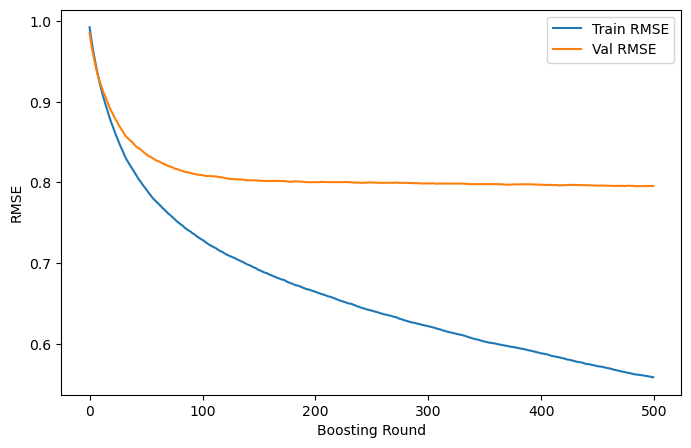

Starts overfitting at RMSE 0.9290


In [54]:
# XGB Regression

xgbr_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    eval_metric='rmse',
    random_state=0
)

xgbr_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

In [55]:
rmse_scorer = make_scorer(lambda y_true, y_pred: -root_mean_squared_error(y_true, y_pred))

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2, 2.5, 3]
}

xgbr = XGBRegressor(random_state=0)

random_search = RandomizedSearchCV(
    estimator=xgbr,
    param_distributions=param_dist,
    n_iter=30,
    scoring=rmse_scorer,
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=0
)

random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
print(f'Validation RMSE: {rmse_val:.4f}')

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'subsample': 0.9, 'reg_lambda': 2.5, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
Validation RMSE: 0.7958


[0]	validation_0-rmse:0.99419	validation_1-rmse:0.98656
[1]	validation_0-rmse:0.98631	validation_1-rmse:0.98026
[2]	validation_0-rmse:0.97887	validation_1-rmse:0.97408
[3]	validation_0-rmse:0.97184	validation_1-rmse:0.96875
[4]	validation_0-rmse:0.96527	validation_1-rmse:0.96350
[5]	validation_0-rmse:0.95865	validation_1-rmse:0.95837
[6]	validation_0-rmse:0.95229	validation_1-rmse:0.95343
[7]	validation_0-rmse:0.94625	validation_1-rmse:0.94910
[8]	validation_0-rmse:0.94037	validation_1-rmse:0.94447
[9]	validation_0-rmse:0.93468	validation_1-rmse:0.94041
[10]	validation_0-rmse:0.92928	validation_1-rmse:0.93654
[11]	validation_0-rmse:0.92388	validation_1-rmse:0.93290
[12]	validation_0-rmse:0.91836	validation_1-rmse:0.92874
[13]	validation_0-rmse:0.91341	validation_1-rmse:0.92493
[14]	validation_0-rmse:0.90828	validation_1-rmse:0.92113
[15]	validation_0-rmse:0.90341	validation_1-rmse:0.91791
[16]	validation_0-rmse:0.89845	validation_1-rmse:0.91475
[17]	validation_0-rmse:0.89376	validation

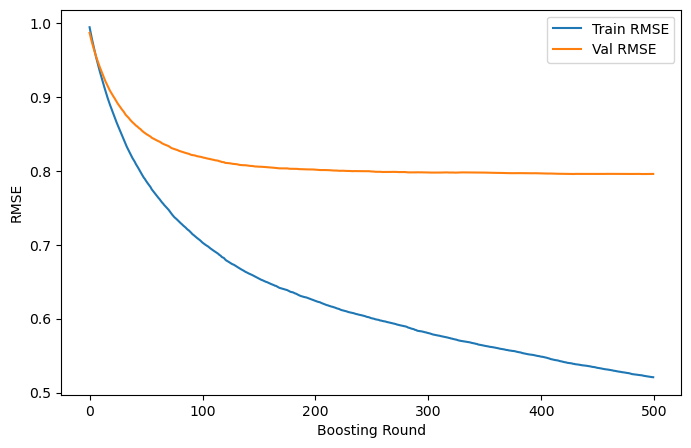

Starts overfitting at RMSE 0.9523


In [56]:
xgbr_model_2 = XGBRegressor(
    **random_search.best_params_,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_2.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_2.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_2.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

[0]	validation_0-rmse:0.99512	validation_1-rmse:0.98618
[1]	validation_0-rmse:0.98827	validation_1-rmse:0.97952
[2]	validation_0-rmse:0.98228	validation_1-rmse:0.97436
[3]	validation_0-rmse:0.97620	validation_1-rmse:0.96850
[4]	validation_0-rmse:0.97071	validation_1-rmse:0.96343
[5]	validation_0-rmse:0.96573	validation_1-rmse:0.95878
[6]	validation_0-rmse:0.96046	validation_1-rmse:0.95393
[7]	validation_0-rmse:0.95564	validation_1-rmse:0.94984
[8]	validation_0-rmse:0.95091	validation_1-rmse:0.94566
[9]	validation_0-rmse:0.94655	validation_1-rmse:0.94237
[10]	validation_0-rmse:0.94257	validation_1-rmse:0.93875
[11]	validation_0-rmse:0.93857	validation_1-rmse:0.93490
[12]	validation_0-rmse:0.93477	validation_1-rmse:0.93191
[13]	validation_0-rmse:0.93114	validation_1-rmse:0.92867
[14]	validation_0-rmse:0.92786	validation_1-rmse:0.92598
[15]	validation_0-rmse:0.92404	validation_1-rmse:0.92216
[16]	validation_0-rmse:0.92030	validation_1-rmse:0.91844
[17]	validation_0-rmse:0.91699	validation

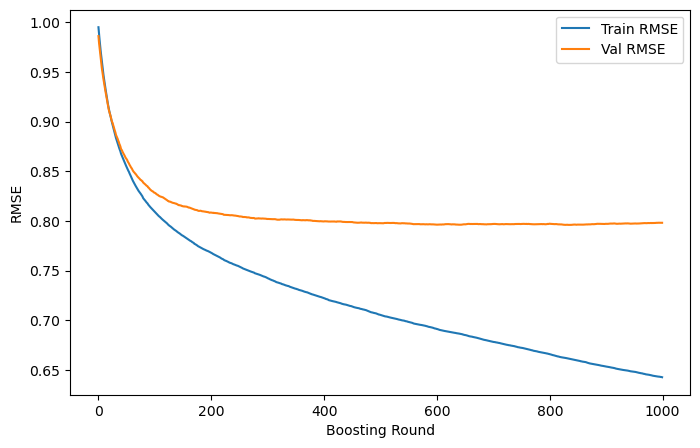

Starts overfitting at RMSE 0.9064


In [57]:
trial_params = {
    'max_depth': 4,
    'min_child_weight': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'gamma': 2,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'learning_rate': 0.05,
    'n_estimators': 1000
}


xgbr_model_3 = XGBRegressor(
    **trial_params,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_3.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_3.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_3.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8685 - mae: 0.7566 - val_loss: 0.6771 - val_mae: 0.6778
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.6944 - mae: 0.6829 - val_loss: 0.6648 - val_mae: 0.6708
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.6328 - mae: 0.6519 - val_loss: 0.6607 - val_mae: 0.6652
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.6289 - mae: 0.6488 - val_loss: 0.6671 - val_mae: 0.6565
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.5727 - mae: 0.6114 - val_loss: 0.6562 - val_mae: 0.6565
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.5145 - mae: 0.5798 - val_loss: 0.6717 - val_mae: 0.6574
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.4793 - mae: 0.5568 - val_loss: 0.6803 - val_mae: 0.6613
Epoch 8/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.4386 - mae: 0.5302 - val_loss: 0.6975 - val_mae: 0.6743
Epoch 9/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 89

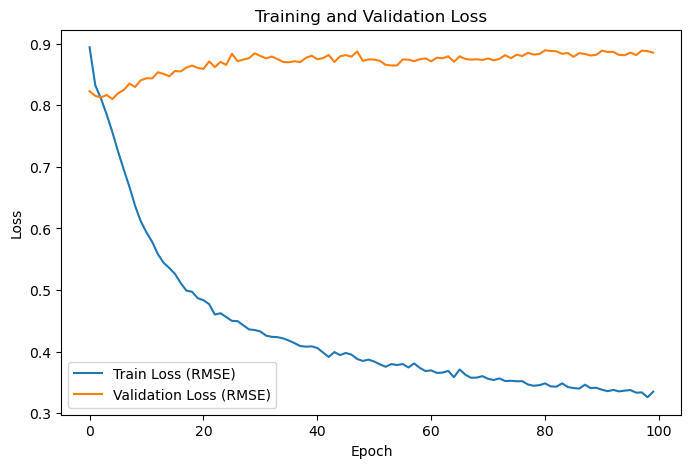

In [58]:
# Neural Network Regression

nnr_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

nnr_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = nnr_model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

y_pred = nnr_model.predict(X_val).flatten()

rmse_val = np.sqrt(root_mean_squared_error(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)

print(f'Validation RMSE: {rmse_val:.4f}')
print(f'Validation R²: {r2_val:.4f}')

plt.figure(figsize=(8,5))
plt.plot(np.sqrt(history.history['loss']), label='Train Loss (RMSE)')
plt.plot(np.sqrt(history.history['val_loss']), label='Validation Loss (RMSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73046
[LightGBM] [Info] Number of data points in the train set: 13780, number of used features: 300
[LightGBM] [Info] Start training from score 0.001385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

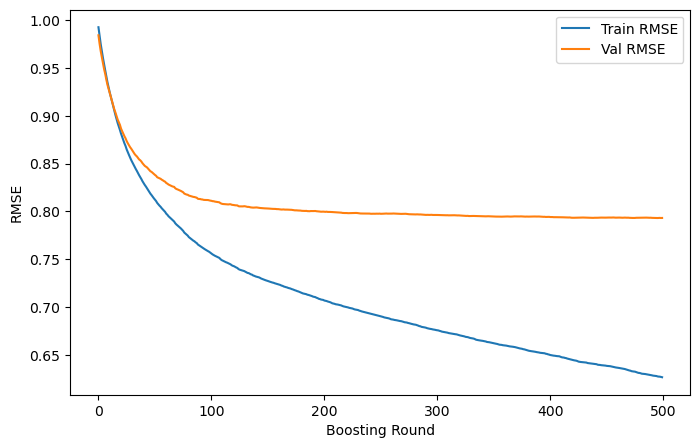

Starts overfitting at RMSE 0.9148 on iteration 13


In [60]:
# Light GBM Regression

lgbmr_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=0
)

lgbmr_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='rmse',
)

y_pred = lgbmr_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'Validation R2: {r2_val:.4f}')

evals_result = lgbmr_model.evals_result_

plt.figure(figsize=(8, 5))
plt.plot(evals_result['training']['rmse'], label='Train RMSE')
plt.plot(evals_result['valid_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

train_rmse = evals_result['training']['rmse']
val_rmse = evals_result['valid_1']['rmse']

for i in range(len(train_rmse)):
    if train_rmse[i] < val_rmse[i]:
        print(f'Starts overfitting at RMSE {train_rmse[i]:.4f} on iteration {i+1}')
        break

All models so far have to high an RMSE. Let's quickly try to restrict the data set to a more normal distribution (by removing zero ratings). This is a compromise, since we ommit some useful signal by removing this data.

# Regression - All Games with Non-Zero Ratings

In [ ]:
df_reg = pd.read_csv('../data/preprocessed_games_pos_rating_reg.csv')
print(df_reg.shape)
df_reg

(12797, 302)


,id,2d,3d,ability,able,access,account,achievement,achievements,action,adventure,alien,all,ancient,and,anime,app,arcade,area,army,art,atmospheric,attack,available,base,based,battle,beautiful,best,big,boss,building,campaign,car,card,cards,challenge,character,choice,city,...,technology,term,thing,third,time,title,to,tool,top,town,track,trademark,trading,true,turn,type,ultimate,unique,unit,universe,up,upgrade,use,variety,various,vehicle,version,video,violent,visual,war,way,weapon,whole,world,www,year,young,zombie,success
0,3498,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.073375,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.113673,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.155724,0.0,0.146136,0.000000,0.0,0.0,0.000000,0.131755,0.091809,0.0,0.0,...,0.0,0.0,0.0,0.264819,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.196272,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.171135,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.149395,0.0,0.000000,0.0,0.0,4.234134
1,3328,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.171782,0.092724,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.104296,0.0,0.00000,0.161088,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.134081,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.364461,0.079109,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.090041,0.0,0.000000,0.0,0.000000,0.0,0.0,0.131468,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.342679,0.0,0.000000,0.0,0.0,4.481091
2,4200,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.042788,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.085998,0.066288,0.0,0.07363,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.056597,0.000000,0.053538,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.055877,0.00000,0.0,0.0,0.0,0.000000,0.0,0.092474,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.057324,0.063300,0.0,0.000000,0.0,0.000000,0.0,0.0,4.319240
3,4291,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.070994,0.000000,0.000000,0.163463,0.0,0.000000,0.0,0.0,0.146394,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.104098,0.0,0.127425,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.093904,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.092710,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.138638,0.000000,0.0,0.000000,0.0,0.148269,0.135222,0.000000,0.315079,0.0,0.000000,0.0,0.000000,0.0,0.0,2.576266
4,5286,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.301208,0.162585,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.091438,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.241276,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.319530,0.069356,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.087317,0.0,0.060087,0.0,0.000000,0.0,0.0,3.323807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,337607,0.25141,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.366899,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.360155,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.296727,0.0,0.0,0.072185
12793,326782,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00

In [62]:
df_reg.describe()

,id,2d,3d,ability,able,access,account,achievement,achievements,action,adventure,alien,all,ancient,and,anime,app,arcade,area,army,art,atmospheric,attack,available,base,based,battle,beautiful,best,big,boss,building,campaign,car,card,cards,challenge,character,choice,city,...,technology,term,thing,third,time,title,to,tool,top,town,track,trademark,trading,true,turn,type,ultimate,unique,unit,universe,up,upgrade,use,variety,various,vehicle,version,video,violent,visual,war,way,weapon,whole,world,www,year,young,zombie,success
count,1.279700e+04,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,...,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,1.279700e+04
mean,1.310125e+05,0.023961,0.009784,0.021084,0.009883,0.014197,0.008998,0.009674,0.034924,0.037178,0.035457,0.011794,0.009143,0.010690,0.009804,0.013481,0.011892,0.009289,0.010312,0.010346,0.012816,0.021645,0.013000,0.017001,0.007743,0.019853,0.033039,0.010460,0.016471,0.010847,0.009263,0.014207,0.012906,0.011747,0.012464,0.025595,0.017067,0.044061,0.013022,0.020669,...,0.008763,0.011240,0.011845,0.018866,0.039660,0.012142,0.015919,0.007804,0.013973,0.010363,0.010748,0.008658,0.027503,0.013659,0.018343,0.011911,0.009203,0.030152,0.010394,0.011124,0.009097,0.009826,0.009622,0.012917,0.013002,0.010755,0.017780,0.014664,0.012664,0.012927,0.017582,0.031348,0.030771,0.007888,0.061234,0.009204,0.019119,0.009655,0.008119,3.198192e-16
std,2.304513e+05,0.055242,0.041204,0.056538,0.042066,0.044754,0.044219,0.046189,0.042619,0.070338,0.074030,0.061400,0.046373,0.049086,0.042411,0.051408,0.049410,0.052009,0.046776,0.050294,0.049204,0.051117,0.050892,0.049852,0.043904,0.062742,0.078902,0.045998,0.052589,0.047114,0.043753,0.055778,0.051297,0.071141,0.071909,0.047240,0.054035,0.083773,0.051486,0.077459,...,0.042836,0.055741,0.047133,0.059766,0.068297,0.052653,0.048201,0.041628,0.049930,0.054843,0.056932,0.055518,0.051041,0.049727,0.067141,0.046135,0.043491,0.059760,0.056856,0.049232,0.042588,0.045424,0.040807,0.044837,0.046671,0.057743,0.066932,0.068580,0.047429,0.053525,0.064210,0.063204,0.072732,0.037593,0.089299,0.046550,0.061263,0.047389,0.062010,1.000039e+00
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.198919e+00
25%,1.197200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

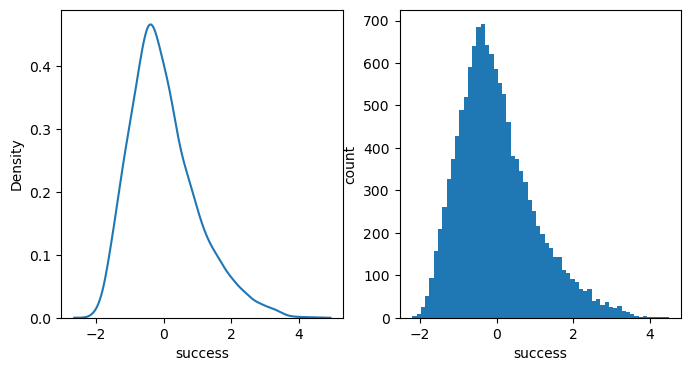

In [63]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df_reg['success'])
plt.xlabel('success')
plt.subplot(1,2,2)
plt.hist(df_reg['success'], bins=60)
plt.xlabel('success')
plt.ylabel('count')
plt.show()

In [64]:
X = df_reg.iloc[:,1:-1]
y = df_reg.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len}')

Train size: 10237
Validation size: 1280
Test size: <built-in function len>


In [65]:
rlr_model_3 = Ridge(alpha=1.0)

rlr_model_3.fit(X_train, y_train)

y_pred = rlr_model_3.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

RMSE: 0.8441
R²: 0.2465


Not much of an improvement on the results using the previous dataset. Let's try our best model from last time to compare.

[0]	validation_0-rmse:0.99953	validation_1-rmse:0.96516
[1]	validation_0-rmse:0.99129	validation_1-rmse:0.95775
[2]	validation_0-rmse:0.98395	validation_1-rmse:0.95068
[3]	validation_0-rmse:0.97699	validation_1-rmse:0.94405
[4]	validation_0-rmse:0.97023	validation_1-rmse:0.93730
[5]	validation_0-rmse:0.96318	validation_1-rmse:0.93123
[6]	validation_0-rmse:0.95701	validation_1-rmse:0.92553
[7]	validation_0-rmse:0.95138	validation_1-rmse:0.92036
[8]	validation_0-rmse:0.94621	validation_1-rmse:0.91625
[9]	validation_0-rmse:0.94120	validation_1-rmse:0.91251
[10]	validation_0-rmse:0.93647	validation_1-rmse:0.90838
[11]	validation_0-rmse:0.93135	validation_1-rmse:0.90480
[12]	validation_0-rmse:0.92717	validation_1-rmse:0.90101
[13]	validation_0-rmse:0.92294	validation_1-rmse:0.89823
[14]	validation_0-rmse:0.91893	validation_1-rmse:0.89520
[15]	validation_0-rmse:0.91461	validation_1-rmse:0.89197
[16]	validation_0-rmse:0.91024	validation_1-rmse:0.88871
[17]	validation_0-rmse:0.90702	validation

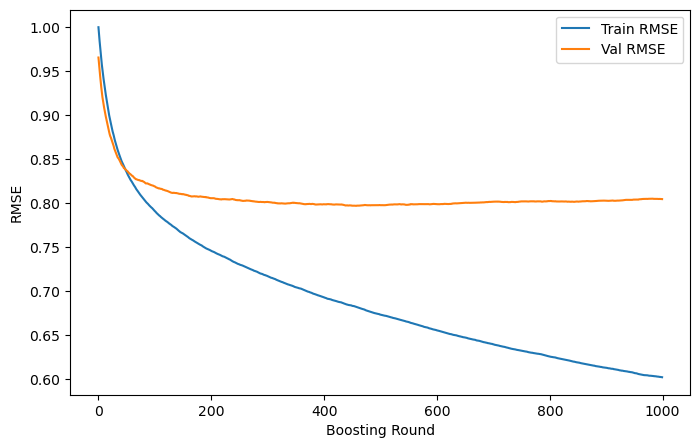

Starts overfitting at RMSE 0.8377


In [66]:
trial_params = {
    'max_depth': 4,
    'min_child_weight': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'gamma': 2,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'learning_rate': 0.05,
    'n_estimators': 1000
}


xgbr_model_4 = XGBRegressor(
    **trial_params,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_4.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_4.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_4.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

This is better - but still not enough of an improvement to warrant an approach where we have remove such a large portion of the dataset (all zero ratings) that may carry signal.

We will now try a different approach that includes zero ratings, but doesn't focus overly on the actual value of the success score (which is a proxy after all): binning. We will start with 4 bins: zero rating, low, medium and high success.

# Classification - Four Categories

In [67]:
# To keep track of our classifier models, we will unpack the classification report and store its values in a dataframe

def add_to_cat_4_record(performance_record: pd.DataFrame, model_name: str, report, accuracy) -> pd.DataFrame:
    if model_name in performance_record['model'].values:
        return performance_record
    
    new_row = {
        'model': model_name,
        'accuracy': accuracy,
        'f1_weighted': report['weighted avg']['f1-score'],
        'precision_0': report['0.0']['precision'],
        'precision_1': report['1.0']['precision'],
        'precision_2': report['2.0']['precision'],
        'precision_3': report['3.0']['precision'],
        'recall_0': report['0.0']['recall'],
        'recall_1': report['1.0']['recall'],
        'recall_2': report['2.0']['recall'],
        'recall_3': report['3.0']['recall'],
        'f1_0': report['0.0']['f1-score'],
        'f1_1': report['1.0']['f1-score'],
        'f1_2': report['2.0']['f1-score'],
        'f1_3': report['3.0']['f1-score']
    }

    new_df = pd.DataFrame([new_row])
    performance_record = pd.concat([performance_record, new_df], ignore_index=True)
    return performance_record

In [ ]:
df_cat_4 = pd.read_csv('../data/preprocessed_games_cat_4.csv')

cat_4_performance_record = pd.DataFrame(columns=['model', 'accuracy', 'f1_weighted', 'precision_0', 'precision_1', 'precision_2', 'precision_3', 'recall_0', 'recall_1', 'recall_2', 'recall_3', 'f1_0', 'f1_1', 'f1_2', 'f1_3'])

df_cat_4

,id,2d,3d,ability,able,access,account,achievement,achievements,action,adventure,alien,ancient,and,anime,app,arcade,area,army,art,atmospheric,attack,available,base,based,battle,beautiful,best,big,bonus,boss,building,campaign,car,card,cards,challenge,character,choice,city,...,term,thing,third,time,title,to,tool,top,town,track,trading,trap,true,turn,type,ultimate,unique,unit,universe,up,upgrade,use,variety,various,vehicle,version,video,violent,visual,war,way,weapon,whole,work,world,www,year,young,zombie,success_class
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077217,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.125313,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.162803,0.0,0.000000,0.153484,0.000000,0.0,0.0,0.000000,0.137531,0.098372,0.0,0.0,...,0.0,0.000000,0.149081,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.206121,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.18409,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.159854,0.0,0.000000,0.0,0.0,3.0
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.170055,0.090338,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.105190,0.0,0.000000,0.154269,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.128837,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.375422,0.076147,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.086511,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.125708,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.147969,0.335459,0.0,0.000000,0.0,0.0,3.0
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042543,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.084869,0.069041,0.0,0.074181,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.055244,0.000000,0.054198,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.054466,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.093124,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.056385,0.063615,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.0
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069849,0.000000,0.000000,0.161577,0.0,0.0,0.000000,0.138009,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.105111,0.0,0.124897,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.090703,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.089426,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.135467,0.00000,0.000000,0.0,0.0,0.145745,0.134629,0.000000,0.313342,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.0
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333835,0.177341,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.103249,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.265924,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.245663,0.074742,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.095134,0.0,0.000000,0.065854,0.0,0.000000,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.335763,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.

In [69]:
print(df_cat_4['success_class'].value_counts().sort_index())

success_class
0.0    4428
1.0    4267
2.0    4264
3.0    4266
Name: count, dtype: int64


In [70]:
X = df_cat_4.iloc[:,1:-1]
y = df_cat_4.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len(X_test)}')

print(f'Train distribution: {y_train.value_counts().sort_index()}')
print(f'Validation distribution: {y_val.value_counts().sort_index()}')
print(f'Test distribution: {y_test.value_counts().sort_index()}')

Train size: 13780
Validation size: 1722
Test size: 1723
Train distribution: success_class
0.0    3542
1.0    3414
2.0    3411
3.0    3413
Name: count, dtype: int64
Validation distribution: success_class
0.0    443
1.0    426
2.0    426
3.0    427
Name: count, dtype: int64
Test distribution: success_class
0.0    443
1.0    427
2.0    427
3.0    426
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model

Early stopping activated - iteration 13


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


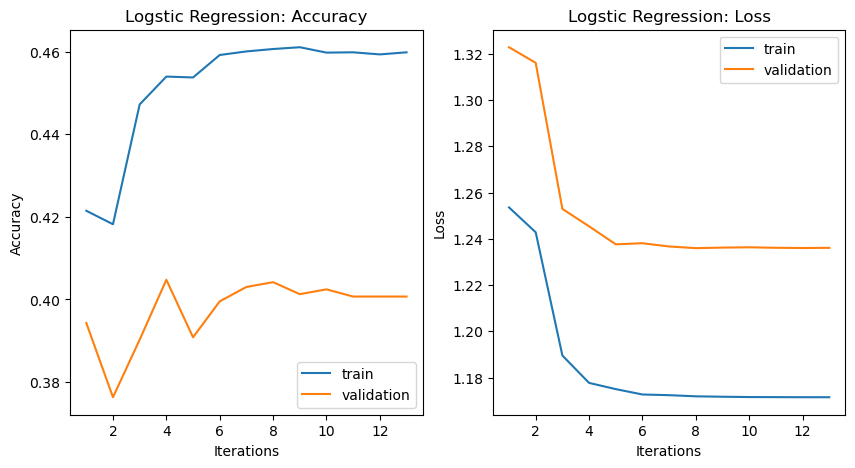

--- Validation Set Scores ---
Accuracy: 0.40069686411149824
Loss 1.236124218717698


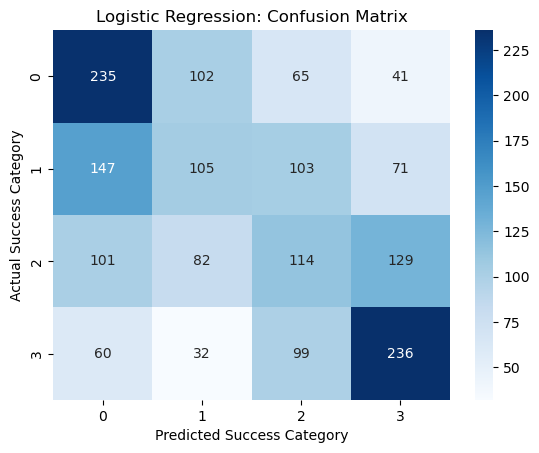

Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.53      0.48       443
         1.0       0.33      0.25      0.28       426
         2.0       0.30      0.27      0.28       426
         3.0       0.49      0.55      0.52       427

    accuracy                           0.40      1722
   macro avg       0.39      0.40      0.39      1722
weighted avg       0.39      0.40      0.39      1722



/var/folders/58/jk9t7ygx41zcr6078k3w_g580000gn/T/ipykernel_10313/2804746553.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_record = pd.concat([performance_record, new_df], ignore_index=True)


In [71]:
# Logistic Regression

accuracy_train_list = []
accuracy_val_list = []
loss_train_list = []
loss_val_list = []
iteration_list = []

lowest_loss = np.inf
consecutive_loss_fall = 0
for i in range(1, 1000):
    lr_model = LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        max_iter=i,
        warm_start=True, # to keep previous coefficients
        random_state=0
    )

    lr_model.fit(X_train, y_train)

    y_hat_train = lr_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_hat_train)
    accuracy_train_list.append(accuracy_train)
    y_proba_train = lr_model.predict_proba(X_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_train_list.append(loss_train)

    y_hat_val = lr_model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_hat_val)
    accuracy_val_list.append(accuracy_val)
    y_proba_val = lr_model.predict_proba(X_val)
    loss_val = log_loss(y_val, y_proba_val)
    loss_val_list.append(loss_val)

    iteration_list.append(i)

    if loss_val < lowest_loss:
        lowest_loss = loss_val
        consecutive_loss_fall = 0
    else:
        consecutive_loss_fall += 1
    
    if consecutive_loss_fall == 5:
        print(f"Early stopping activated - iteration {i}")
        break
    else:
        continue

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(iteration_list, accuracy_train_list, label="train")
plt.plot(iteration_list, accuracy_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Logstic Regression: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(iteration_list, loss_train_list, label="train")
plt.plot(iteration_list, loss_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logstic Regression: Loss")
plt.legend()

plt.show()

y_hat_val = lr_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
y_proba_val = lr_model.predict_proba(X_val)
loss_val = log_loss(y_val, y_proba_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}\nLoss {loss_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

print(f"Classification Report:\n{classification_report(y_val, y_hat_val)}")

cat_4_performance_record = add_to_cat_4_record(
    cat_4_performance_record,
    'lr_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

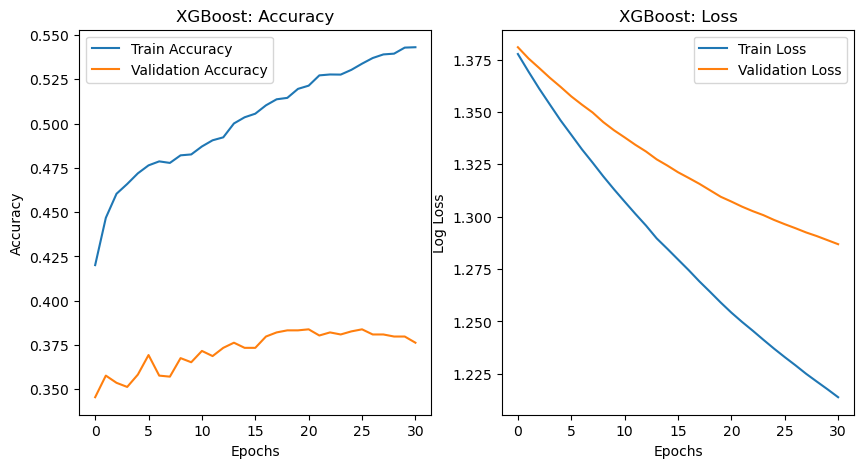

--- Validation Set Scores ---
Accuracy: 0.37630662020905925


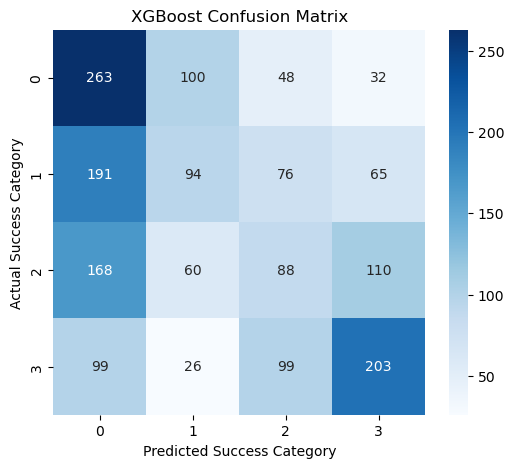

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.36      0.59      0.45       443
         1.0       0.34      0.22      0.27       426
         2.0       0.28      0.21      0.24       426
         3.0       0.50      0.48      0.49       427

    accuracy                           0.38      1722
   macro avg       0.37      0.37      0.36      1722
weighted avg       0.37      0.38      0.36      1722



In [72]:
# XGB Classification

dm_train = xgb.DMatrix(X_train, label=y_train)
dm_val = xgb.DMatrix(X_val, label=y_val)
dm_test = xgb.DMatrix(X_test, label=y_test)

model_parameters = {
    "objective": "multi:softmax",
    "num_class": 4,
    "eval_metric": ["mlogloss", "merror"],
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

evals_result = {} # store training history

xgbc_model = xgb.train(
    model_parameters,
    dm_train,
    num_boost_round=100,
    evals=[(dm_train, "train"), (dm_val, "val")],
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = False
)

num_epochs = len(evals_result["train"]["mlogloss"])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(num_epochs), 1 - np.array(evals_result["train"]["merror"]), label="Train Accuracy")
plt.plot(range(num_epochs), 1 - np.array(evals_result["val"]["merror"]), label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("XGBoost: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs), evals_result["train"]["mlogloss"], label="Train Loss")
plt.plot(range(num_epochs), evals_result["val"]["mlogloss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("XGBoost: Loss")
plt.legend()

plt.show()

y_hat_val = xgbc_model.predict(dm_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("XGBoost Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_4_performance_record = add_to_cat_4_record(
    cat_4_performance_record,
    'xgbc_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

In [73]:
cat_4_performance_record

,model,accuracy,f1_weighted,precision_0,precision_1,precision_2,precision_3,recall_0,recall_1,recall_2,recall_3,f1_0,f1_1,f1_2,f1_3
0,lr_model,0.400697,0.391538,0.432781,0.327103,0.299213,0.494759,0.530474,0.246479,0.267606,0.552693,0.476673,0.281124,0.282528,0.522124
1,xgbc_model,0.376307,0.361487,0.364771,0.335714,0.282958,0.495122,0.593679,0.220657,0.206573,0.475410,0.451890,0.266289,0.238806,0.485066


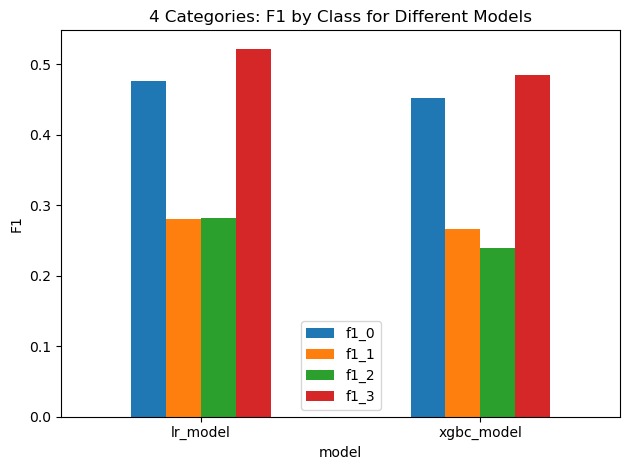

In [74]:
cat_4_performance_record.set_index('model')[['f1_0', 'f1_1', 'f1_2', 'f1_3']].plot(kind='bar')
plt.ylabel("F1")
plt.title("4 Categories: F1 by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

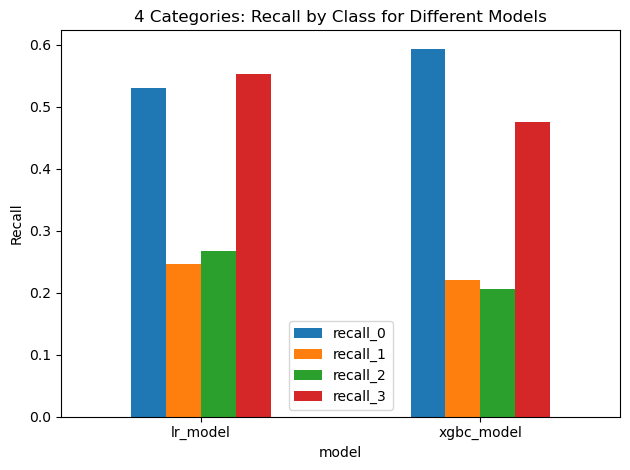

In [75]:
cat_4_performance_record.set_index('model')[['recall_0', 'recall_1', 'recall_2', 'recall_3']].plot(kind='bar')
plt.ylabel("Recall")
plt.title("4 Categories: Recall by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

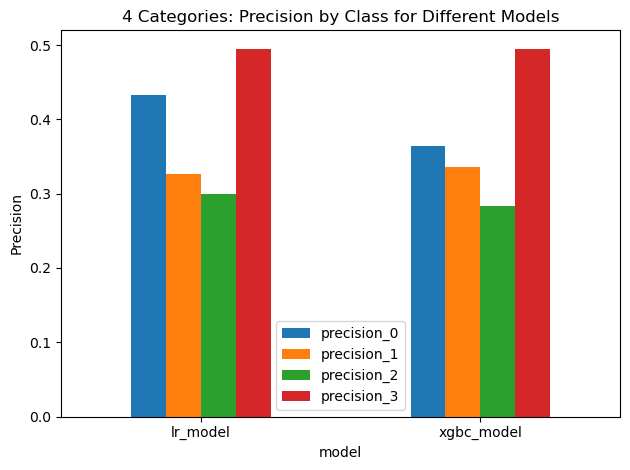

In [76]:
cat_4_performance_record.set_index('model')[['precision_0', 'precision_1', 'precision_2', 'precision_3']].plot(kind='bar')
plt.ylabel("Precision")
plt.title("4 Categories: Precision by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

Our classifiers are generally poor with differentiating middle categories from the extreme top and bottom categories.

It might be easier if we split the data into only three categories - zero ratings, normal success and higher success.

# Classification - Three Categories

In [77]:
def add_to_cat_3_record(performance_record: pd.DataFrame, model_name: str, report, accuracy) -> pd.DataFrame:
    if model_name in performance_record['model'].values:
        return performance_record
    
    new_row = {
        'model': model_name,
        'accuracy': accuracy,
        'f1_weighted': report['weighted avg']['f1-score'],
        'precision_0': report['0.0']['precision'],
        'precision_1': report['1.0']['precision'],
        'precision_2': report['2.0']['precision'],
        'recall_0': report['0.0']['recall'],
        'recall_1': report['1.0']['recall'],
        'recall_2': report['2.0']['recall'],
        'f1_0': report['0.0']['f1-score'],
        'f1_1': report['1.0']['f1-score'],
        'f1_2': report['2.0']['f1-score']
    }

    new_df = pd.DataFrame([new_row])
    performance_record = pd.concat([performance_record, new_df], ignore_index=True)
    return performance_record

In [ ]:
df_cat_3 = pd.read_csv('../data/preprocessed_games_cat_3.csv')

cat_3_performance_record = pd.DataFrame(columns=['model','accuracy','f1_weighted', 'precision_0', 'precision_1', 'precision_2', 'recall_0', 'recall_1', 'recall_2', 'f1_0', 'f1_1', 'f1_2'])

df_cat_3

,id,2d,3d,ability,able,access,account,achievement,achievements,action,adventure,alien,ancient,and,anime,app,arcade,area,army,art,atmospheric,attack,available,base,based,battle,beautiful,best,big,bonus,boss,building,campaign,car,card,cards,challenge,character,choice,city,...,term,thing,third,time,title,to,tool,top,town,track,trading,trap,true,turn,type,ultimate,unique,unit,universe,up,upgrade,use,variety,various,vehicle,version,video,violent,visual,war,way,weapon,whole,work,world,www,year,young,zombie,success_class
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077217,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.125313,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.162803,0.0,0.000000,0.153484,0.000000,0.0,0.0,0.000000,0.137531,0.098372,0.0,0.0,...,0.0,0.000000,0.149081,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.206121,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.18409,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.159854,0.0,0.000000,0.0,0.0,2.0
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.170055,0.090338,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.105190,0.0,0.000000,0.154269,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.128837,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.375422,0.076147,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.086511,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.125708,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.147969,0.335459,0.0,0.000000,0.0,0.0,2.0
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042543,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.084869,0.069041,0.0,0.074181,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.055244,0.000000,0.054198,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.054466,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.093124,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.056385,0.063615,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.0
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069849,0.000000,0.000000,0.161577,0.0,0.0,0.000000,0.138009,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.105111,0.0,0.124897,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.090703,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.089426,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.135467,0.00000,0.000000,0.0,0.0,0.145745,0.134629,0.000000,0.313342,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.0
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333835,0.177341,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.103249,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.265924,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.245663,0.074742,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.095134,0.0,0.000000,0.065854,0.0,0.000000,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.335763,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.

In [79]:
print(df_cat_3['success_class'].value_counts().sort_index())

success_class
0.0    4428
1.0    6399
2.0    6398
Name: count, dtype: int64


In [80]:
X = df_cat_3.iloc[:,1:-1]
y = df_cat_3.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len(X_test)}')

print(f'Train distribution: {y_train.value_counts().sort_index()}')
print(f'Validation distribution: {y_val.value_counts().sort_index()}')
print(f'Test distribution: {y_val.value_counts().sort_index()}')

Train size: 13780
Validation size: 1722
Test size: 1723
Train distribution: success_class
0.0    3542
1.0    5119
2.0    5119
Name: count, dtype: int64
Validation distribution: success_class
0.0    443
1.0    640
2.0    639
Name: count, dtype: int64
Test distribution: success_class
0.0    443
1.0    640
2.0    639
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model

Early stopping activated - iteration 12


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


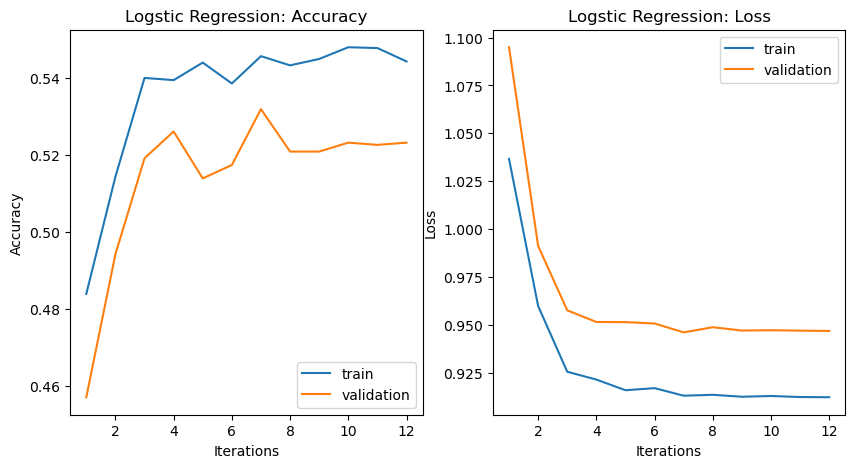

--- Validation Set Scores ---
Accuracy: 0.5232288037166086
Loss 0.9467769762834661


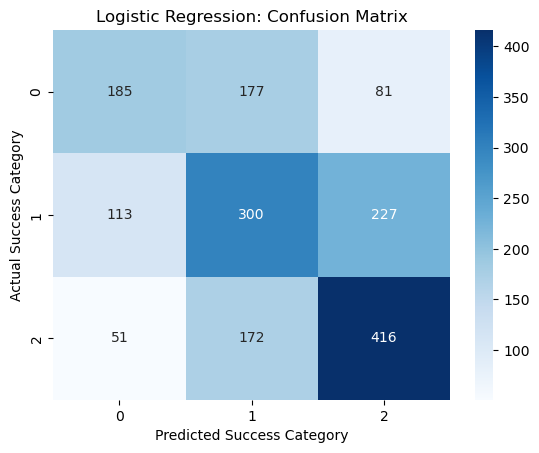

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.42      0.47       443
         1.0       0.46      0.47      0.47       640
         2.0       0.57      0.65      0.61       639

    accuracy                           0.52      1722
   macro avg       0.52      0.51      0.51      1722
weighted avg       0.52      0.52      0.52      1722



/var/folders/58/jk9t7ygx41zcr6078k3w_g580000gn/T/ipykernel_10313/1386029636.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_record = pd.concat([performance_record, new_df], ignore_index=True)


In [81]:
# Logistic Regression

accuracy_train_list = []
accuracy_val_list = []
loss_train_list = []
loss_val_list = []
iteration_list = []

lowest_loss = np.inf
consecutive_loss_fall = 0
for i in range(1, 1000):
    lr_model_2 = LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        max_iter=i,
        warm_start=True, # to keep previous coefficients
        random_state=0
    )

    lr_model_2.fit(X_train, y_train)

    y_hat_train = lr_model_2.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_hat_train)
    accuracy_train_list.append(accuracy_train)
    y_proba_train = lr_model_2.predict_proba(X_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_train_list.append(loss_train)

    y_hat_val = lr_model_2.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_hat_val)
    accuracy_val_list.append(accuracy_val)
    y_proba_val = lr_model_2.predict_proba(X_val)
    loss_val = log_loss(y_val, y_proba_val)
    loss_val_list.append(loss_val)

    iteration_list.append(i)

    if loss_val < lowest_loss:
        lowest_loss = loss_val
        consecutive_loss_fall = 0
    else:
        consecutive_loss_fall += 1
    
    if consecutive_loss_fall == 5:
        print(f"Early stopping activated - iteration {i}")
        break
    else:
        continue

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(iteration_list, accuracy_train_list, label="train")
plt.plot(iteration_list, accuracy_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Logstic Regression: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(iteration_list, loss_train_list, label="train")
plt.plot(iteration_list, loss_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logstic Regression: Loss")
plt.legend()

plt.show()

y_hat_val = lr_model_2.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
y_proba_val = lr_model_2.predict_proba(X_val)
loss_val = log_loss(y_val, y_proba_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}\nLoss {loss_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

print(f"Classification Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'lr_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

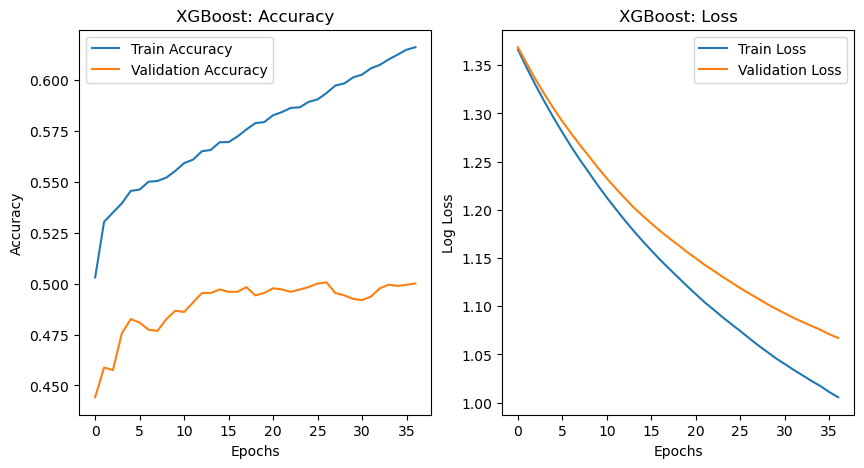

--- Validation Set Scores ---
Accuracy: 0.5


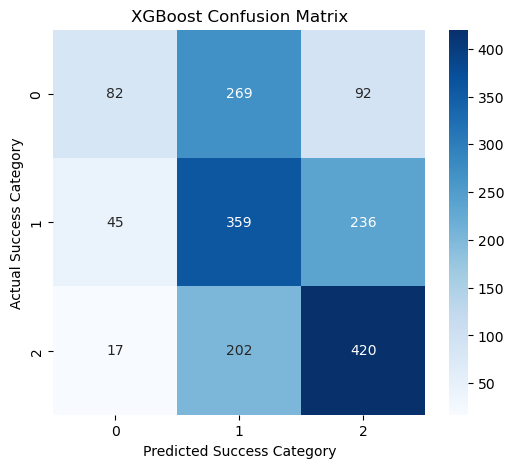

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.57      0.19      0.28       443
         1.0       0.43      0.56      0.49       640
         2.0       0.56      0.66      0.61       639

    accuracy                           0.50      1722
   macro avg       0.52      0.47      0.46      1722
weighted avg       0.52      0.50      0.48      1722



In [82]:
# XGB Classification

dm_train = xgb.DMatrix(X_train, label=y_train)
dm_val = xgb.DMatrix(X_val, label=y_val)
dm_test = xgb.DMatrix(X_test, label=y_test)

model_parameters = {
    "objective": "multi:softmax",
    "num_class": 4,
    "eval_metric": ["mlogloss", "merror"],
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

evals_result = {} # store training history

xgbc_model_2 = xgb.train(
    model_parameters,
    dm_train,
    num_boost_round=100,
    evals=[(dm_train, "train"), (dm_val, "val")],
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = False
)

num_epochs = len(evals_result["train"]["mlogloss"])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(num_epochs), 1 - np.array(evals_result["train"]["merror"]), label="Train Accuracy")
plt.plot(range(num_epochs), 1 - np.array(evals_result["val"]["merror"]), label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("XGBoost: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs), evals_result["train"]["mlogloss"], label="Train Loss")
plt.plot(range(num_epochs), evals_result["val"]["mlogloss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("XGBoost: Loss")
plt.legend()

plt.show()

y_hat_val = xgbc_model_2.predict(dm_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("XGBoost Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'xgbc_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

--- Validation Set Scores ---
Accuracy: 0.47444831591173053


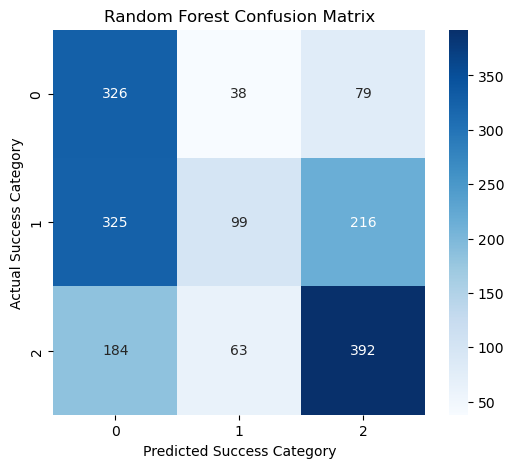

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.39      0.74      0.51       443
         1.0       0.49      0.15      0.24       640
         2.0       0.57      0.61      0.59       639

    accuracy                           0.47      1722
   macro avg       0.49      0.50      0.45      1722
weighted avg       0.50      0.47      0.44      1722



In [83]:
# Random Forest Classification

rfc_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=0,
    n_jobs=-1,
    class_weight='balanced'
)

rfc_model.fit(X_train, y_train)

y_hat_val = rfc_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Random Forest Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'rfc_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.4169 - loss: 1.0530 - val_accuracy: 0.5139 - val_loss: 0.9580
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.5138 - loss: 0.9486 - val_accuracy: 0.5128 - val_loss: 0.9452
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.5354 - loss: 0.9226 - val_accuracy: 0.5186 - val_loss: 0.9415
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.5594 - loss: 0.8991 - val_accuracy: 0.5343 - val_loss: 0.9409
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.5769 - loss: 0.8694 - val_accuracy: 0.5174 - val_loss: 0.9410
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.5925 - loss: 0.8556 - val_accuracy: 0.5273 - val_loss: 0.9455
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.6070 - loss: 0.8293 - val_accuracy: 0.5279 - val_loss: 0.9445
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.6245 - loss: 0.8039 - val_accurac

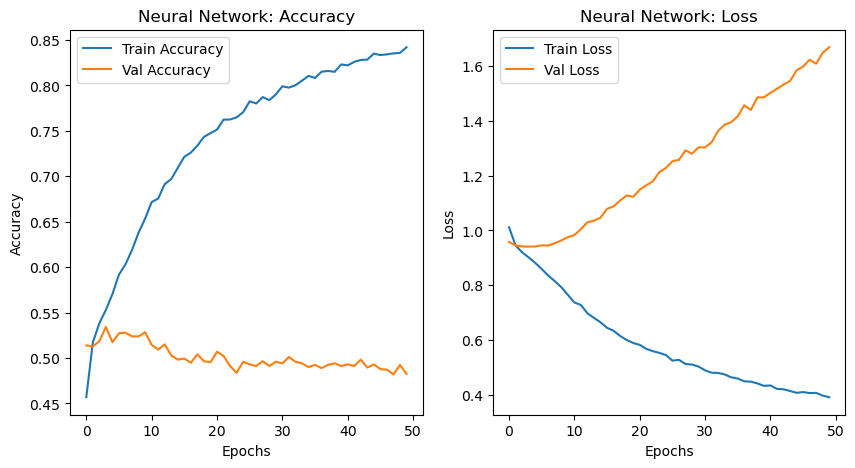

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.4833 - loss: 1.7346
--- Validation Set Scores ---
Accuracy: 0.4825783967971802
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step


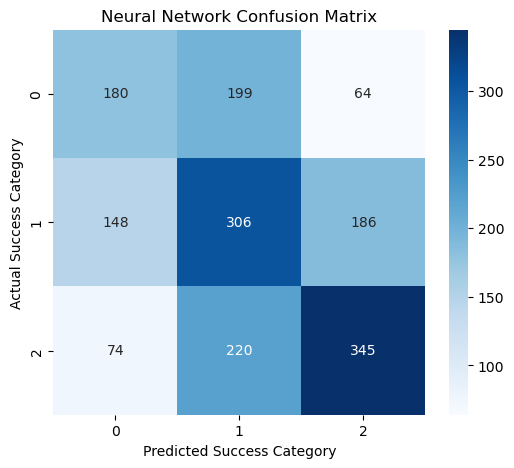

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.45      0.41      0.43       443
         1.0       0.42      0.48      0.45       640
         2.0       0.58      0.54      0.56       639

    accuracy                           0.48      1722
   macro avg       0.48      0.47      0.48      1722
weighted avg       0.49      0.48      0.48      1722



In [84]:
# Neural Network Classification

y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

nn_model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

nn_model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_2.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_2.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_2.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4075 - loss: 1.2074 - val_accuracy: 0.4866 - val_loss: 1.0312
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4832 - loss: 0.9888 - val_accuracy: 0.5134 - val_loss: 0.9526
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5246 - loss: 0.9348 - val_accuracy: 0.5139 - val_loss: 0.9504
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.5351 - loss: 0.9118 - val_accuracy: 0.5099 - val_loss: 0.9392
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.5554 - loss: 0.8853 - val_accuracy: 0.5157 - val_loss: 0.9405
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.5844 - loss: 0.8555 - val_accuracy: 0.5041 - val_loss: 0.9496
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.6041 - loss: 0.8308 - val_accuracy: 0.5064 - val_loss: 0.9529
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.6245 - loss: 0.7906 - val_accuracy: 0.5

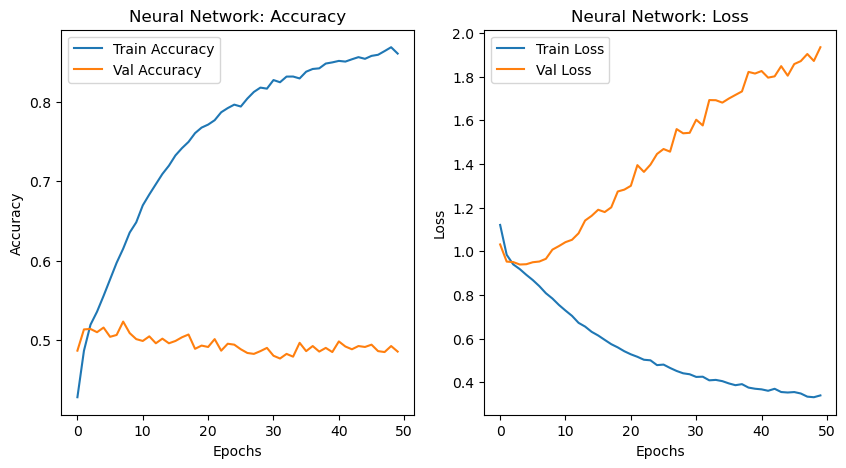

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.4754 - loss: 1.9942
--- Validation Set Scores ---
Accuracy: 0.48548200726509094
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


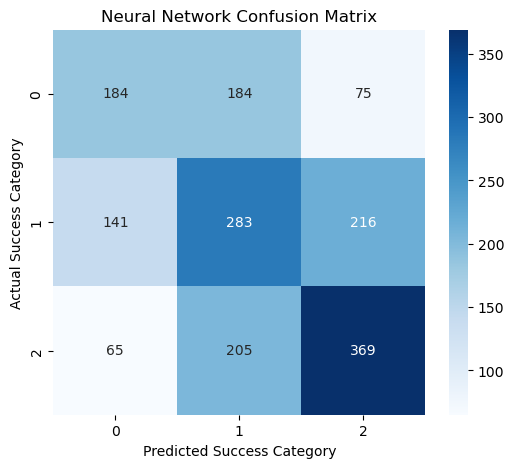

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.47      0.42      0.44       443
         1.0       0.42      0.44      0.43       640
         2.0       0.56      0.58      0.57       639

    accuracy                           0.49      1722
   macro avg       0.48      0.48      0.48      1722
weighted avg       0.49      0.49      0.48      1722



In [85]:
# increased layer size, added extra dropout, added batch normalization

nn_model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

nn_model_3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_3.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_3.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_3.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_3',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4140 - loss: 1.1786 - val_accuracy: 0.4884 - val_loss: 1.0192 - learning_rate: 0.0010
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5086 - loss: 0.9693 - val_accuracy: 0.5232 - val_loss: 0.9533 - learning_rate: 0.0010
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.5297 - loss: 0.9369 - val_accuracy: 0.5192 - val_loss: 0.9442 - learning_rate: 0.0010
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.5450 - loss: 0.9101 - val_accuracy: 0.5105 - val_loss: 0.9396 - learning_rate: 0.0010
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.5651 - loss: 0.8859 - val_accuracy: 0.5151 - val_loss: 0.9462 - learning_rate: 0.0010
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5849 - loss: 0.8543 - val_accuracy: 0.5105 - val_loss: 0.9530 - learning_rate: 0.0010
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.6063 - loss: 0.8224

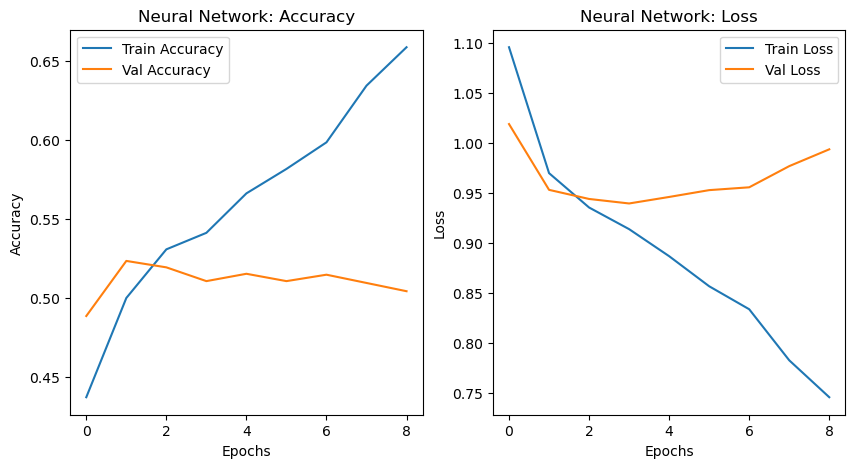

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.4842 - loss: 0.9609
--- Validation Set Scores ---
Accuracy: 0.5104529857635498
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


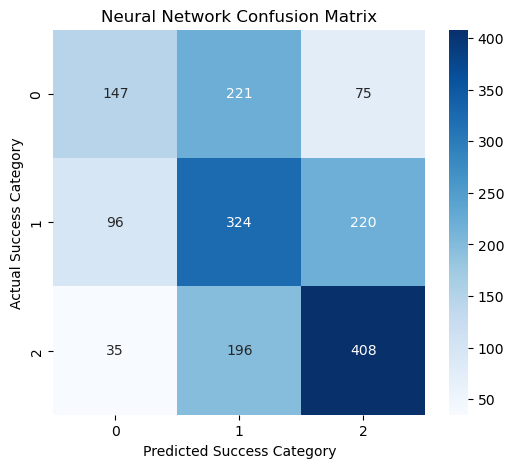

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.53      0.33      0.41       443
         1.0       0.44      0.51      0.47       640
         2.0       0.58      0.64      0.61       639

    accuracy                           0.51      1722
   macro avg       0.52      0.49      0.50      1722
weighted avg       0.51      0.51      0.50      1722



In [86]:
# implemented early stopping and reducelronplateau
# also added class weighting

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

class_weights = dict(zip(
    np.unique(y_train),
    compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
))

nn_model_4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

nn_model_4.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_4.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_4.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_4.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_4',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4305 - loss: 1.1342 - val_accuracy: 0.4774 - val_loss: 1.0020 - learning_rate: 0.0010
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5172 - loss: 0.9574 - val_accuracy: 0.5064 - val_loss: 0.9439 - learning_rate: 0.0010
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5333 - loss: 0.9298 - val_accuracy: 0.5058 - val_loss: 0.9582 - learning_rate: 0.0010
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5485 - loss: 0.9125 - val_accuracy: 0.5017 - val_loss: 0.9509 - learning_rate: 0.0010
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5645 - loss: 0.8860 - val_accuracy: 0.5203 - val_loss: 0.9513 - learning_rate: 0.0010
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5863 - loss: 0.8616 - val_accuracy: 0.5348 - val_loss: 0.9349 - learning_rate: 5.0000e-04
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5958 - loss: 0.8418 - v

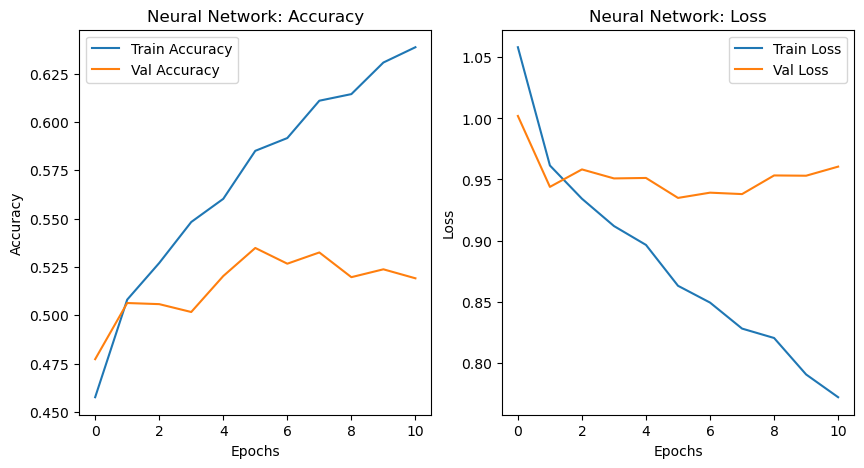

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.5109 - loss: 0.9686
--- Validation Set Scores ---
Accuracy: 0.5348432064056396
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


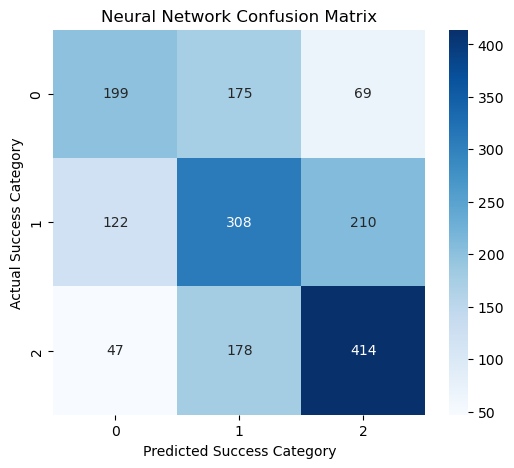

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.54      0.45      0.49       443
         1.0       0.47      0.48      0.47       640
         2.0       0.60      0.65      0.62       639

    accuracy                           0.53      1722
   macro avg       0.53      0.53      0.53      1722
weighted avg       0.53      0.53      0.53      1722



In [87]:
# added leakyrelu and increased model depth

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

class_weights = dict(zip(
    np.unique(y_train),
    compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
))

nn_model_5 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128),
    LeakyReLU(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(),
    Dense(3, activation='softmax')
])

nn_model_5.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_5.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_5.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_5.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_5',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

In [88]:
cat_3_performance_record

,model,accuracy,f1_weighted,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2
0,lr_model_2,0.523229,0.519698,0.530086,0.462250,0.574586,0.417607,0.468750,0.651017,0.467172,0.465477,0.610418
1,xgbc_model_2,0.500000,0.478142,0.569444,0.432530,0.561497,0.185102,0.560937,0.657277,0.279387,0.488435,0.605624
2,rfc_model,0.474448,0.438254,0.390419,0.495000,0.570597,0.735892,0.154688,0.613459,0.510172,0.235714,0.591252
3,nn_model_2,0.482578,0.483728,0.447761,0.422069,0.579832,0.406321,0.478125,0.539906,0.426036,0.448352,0.559157
4,nn_model_3,0.485482,0.484808,0.471795,0.421131,0.559091,0.415350,0.442188,0.577465,0.441777,0.431402,0.568129
5,nn_model_4,0.510453,0.504929,0.528777,0.437247,0.580370,0.331828,0.506250,0.638498,0.407767,0.469225,0.608048
6,nn_model_5,0.534843,0.532897,0.540761,0.465961,0.597403,0.449210,0.481250,0.647887,0.490752,0.473482,0.621622


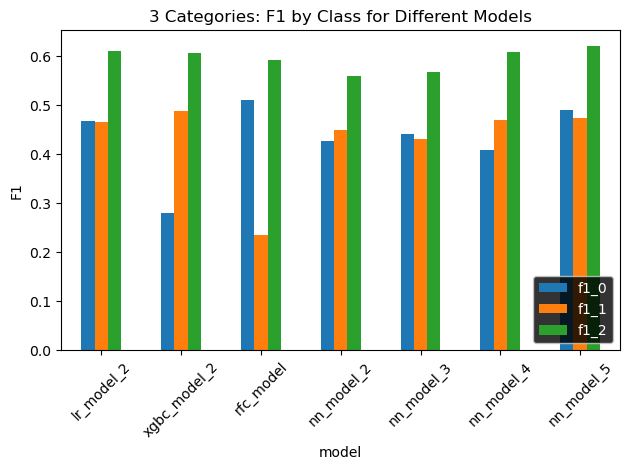

In [89]:
cat_3_performance_record.set_index('model')[['f1_0', 'f1_1', 'f1_2']].plot(kind='bar')
plt.ylabel("F1")
plt.title("3 Categories: F1 by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()

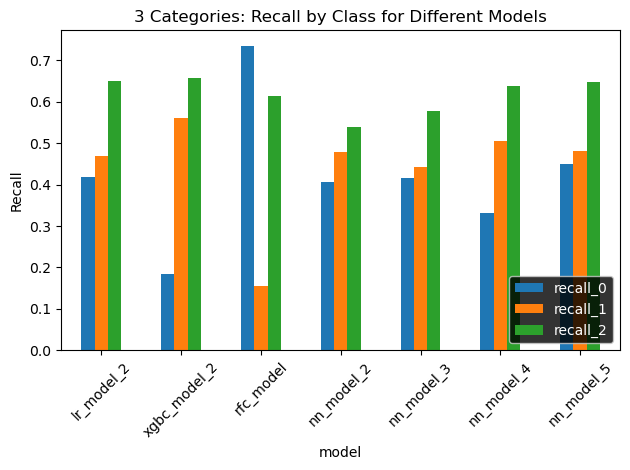

In [90]:
cat_3_performance_record.set_index('model')[['recall_0', 'recall_1', 'recall_2']].plot(kind='bar')
plt.ylabel("Recall")
plt.title("3 Categories: Recall by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()

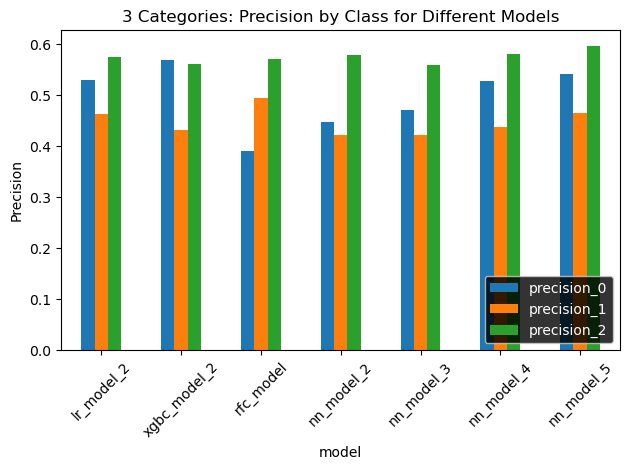

In [91]:
cat_3_performance_record.set_index('model')[['precision_0', 'precision_1', 'precision_2']].plot(kind='bar')
plt.ylabel("Precision")
plt.title("3 Categories: Precision by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()